In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing or loading the dataset
df = pd.read_csv('churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [10]:
#Checking of column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

'customerID', categorical nominal text id data

'gender', categorical nominal data

'SeniorCitizen', categorical data

'Partner', categorical data

'Dependents',categorical data
 
'tenure', Discrete numerical data

'PhoneService', categorical data

'MultipleLines', categorical data

'InternetService', categorical data

'OnlineSecurity', categorical data

'OnlineBackup', categorical data

'DeviceProtection', categorical data

'TechSupport', categorical data

'StreamingTV', categorical data

'StreamingMovies', categorical data

'Contract', categorical ordinal data

'PaperlessBilling', categorical data

'PaymentMethod', categorical data

'MonthlyCharges', Continuous numerical data

'TotalCharges', Continuous numerical data

'Churn', target categorical data which need to be predicted

In [11]:
#Checking for data shape
df.shape

(7043, 21)

In [12]:
#Checking data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
#Checking any null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
#Checking any blank or white spaces
np.where(df.applymap(lambda x: x == ' '))

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],
       dtype=int64),
 array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19], dtype=int64))

Dataset has blank entries which need to be handled

In [15]:
df = df.replace(' ', np.nan)

#Checking any null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
#Handling NaN values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

#Checking any null values
df['TotalCharges'].isnull().sum()

0

In [19]:
pd.set_option('display.max_columns', 21)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
#Checking if all entries of a column is unique or not
for i in df.columns:
    print('For column of {} :'.format(i),(len(df[i].unique())==len(df[i])))

For column of customerID : True
For column of gender : False
For column of SeniorCitizen : False
For column of Partner : False
For column of Dependents : False
For column of tenure : False
For column of PhoneService : False
For column of MultipleLines : False
For column of InternetService : False
For column of OnlineSecurity : False
For column of OnlineBackup : False
For column of DeviceProtection : False
For column of TechSupport : False
For column of StreamingTV : False
For column of StreamingMovies : False
For column of Contract : False
For column of PaperlessBilling : False
For column of PaymentMethod : False
For column of MonthlyCharges : False
For column of TotalCharges : False
For column of Churn : False


CustomerID is having all unique entries and act justlike indexing column

Lets us drop this column

In [21]:
#Dropping customerID column
df = df.drop('customerID', axis=1)

In [22]:
#Removing duplicate rows if any
print('Size before: ',df.shape)
df.drop_duplicates()
print('Size after: ',df.shape)

Size before:  (7043, 20)
Size after:  (7043, 20)


In [23]:
#General information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [26]:
#Seperating categorical and numerical data data columns
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
               'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
target = ['Churn']

In [27]:
#Checking of value counts in each columns categorical data
for i in categorical:
    print(df[i].value_counts(),'\n')

Male      3555
Female    3488
Name: gender, dtype: int64 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

No     3641
Yes    3402
Name: Partner, dtype: int64 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64 

No                     28

In [28]:
#Checking of value counts in each columns of numerical data
for i in numerical:
    print(df[i].value_counts(),'\n')

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64 

20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
87.65      1
35.30      1
114.85     1
56.50      1
97.25      1
Name: MonthlyCharges, Length: 1585, dtype: int64 

2283.300441    11
20.200000      11
19.750000       9
19.650000       8
19.900000       8
               ..
1474.350000     1
6668.350000     1
6096.900000     1
140.700000      1
5867.000000     1
Name: TotalCharges, Length: 6531, dtype: int64 



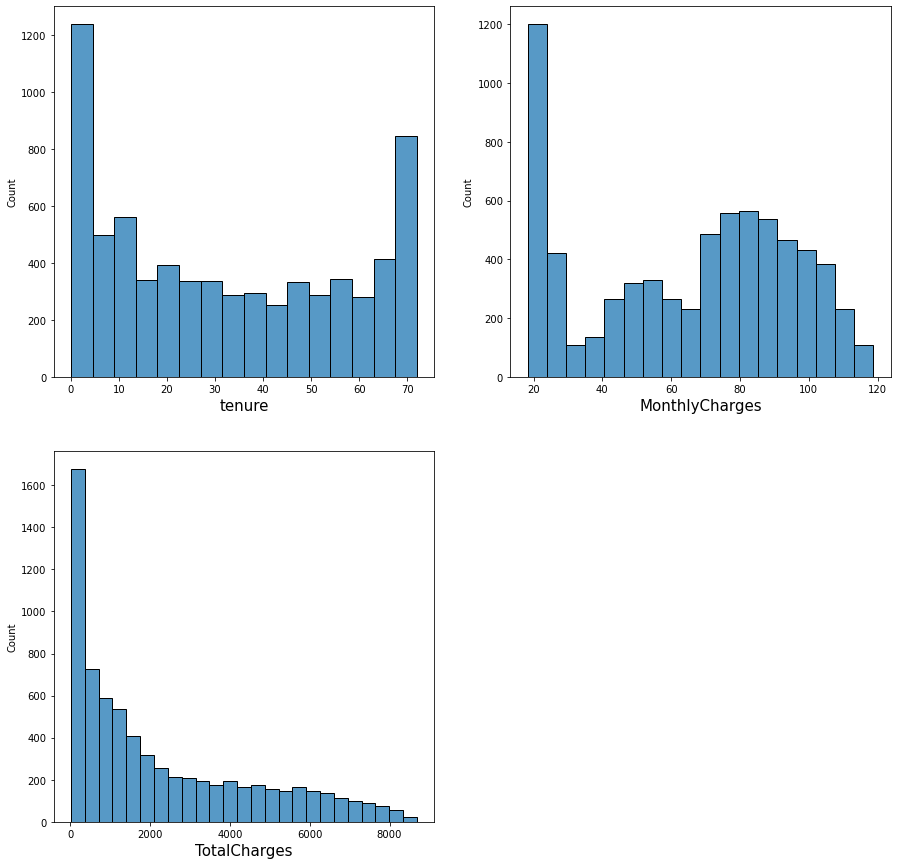

In [29]:
#Checking of histogram each columns having numerical data
plt.figure(figsize=(15,15))
pltno = 1
for columns in numerical:
    if pltno <=4:
        ax = plt.subplot(2,2,pltno)
        sns.histplot(df[columns])
        plt.xlabel(columns, fontsize=15)       
    pltno += 1
plt.show()

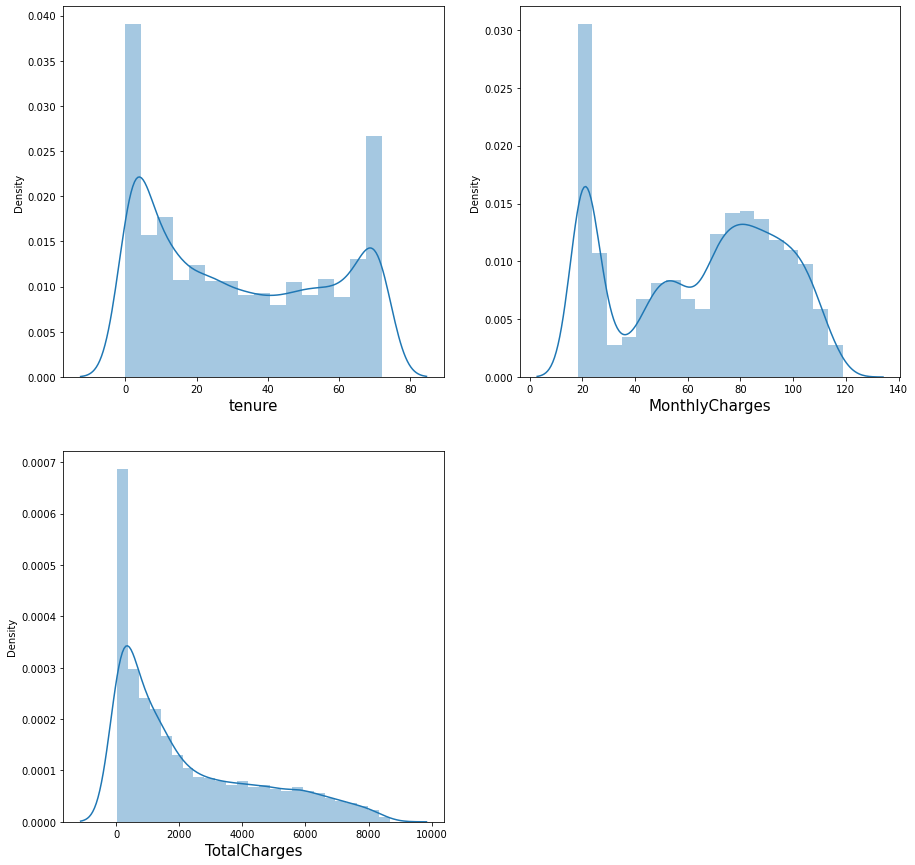

In [30]:
#Checking of distribution plot of each columns having numerical data
plt.figure(figsize=(15,15))
pltno = 1
for columns in numerical:
    if pltno <=4:
        ax = plt.subplot(2,2,pltno)
        sns.distplot(df[columns], kde = True)
        plt.xlabel(columns, fontsize=15)       
    pltno += 1
plt.show()

Tenure graph shows that majority of he customer churn at initial and max tenure duration

Monthly charges distribution shows deviation from Guassian curve

Total charges curve show higher degree of right skewness and number of customers start decreasing when we move towards higher TotalCharges

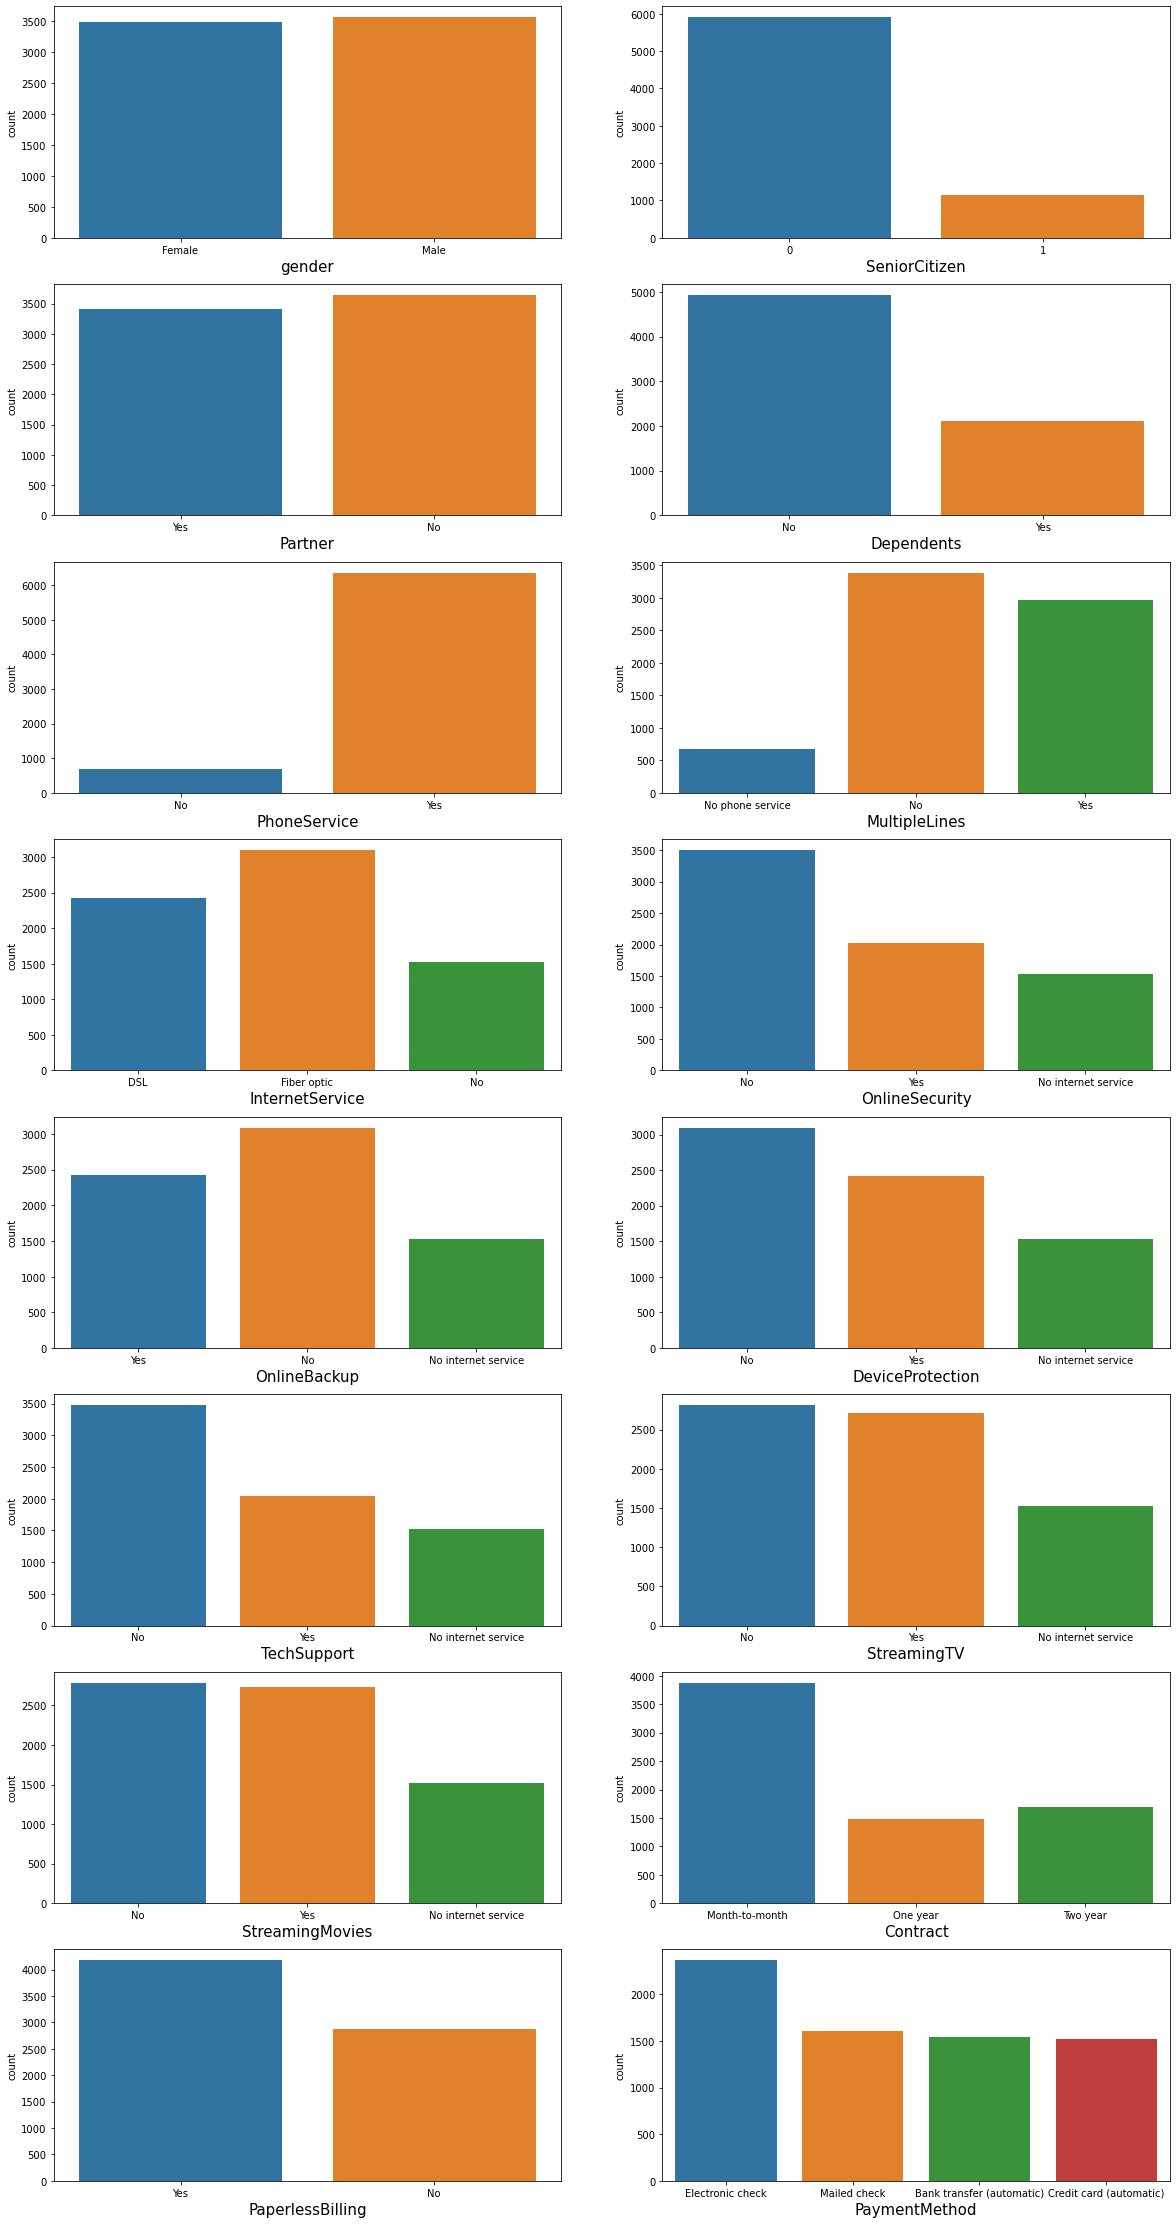

In [37]:
#Categorical
#Checking of value counts in each columns having categorical data
plt.figure(figsize=(20,40))
pltno = 1
for columns in categorical:
    if pltno <=16:
        ax = plt.subplot(8,2,pltno)
        sns.countplot(df[columns])
        plt.xlabel(columns, fontsize=15) 
    pltno += 1
plt.show()

Observvations:

Majority of the customers are not senior citizens

Majority of the customers do not have dependents

Majority of the customers use phone service, among them maority donot use multiple lines

Majority of the customers use Fiber optic service 

Majority of the customers do not use online security

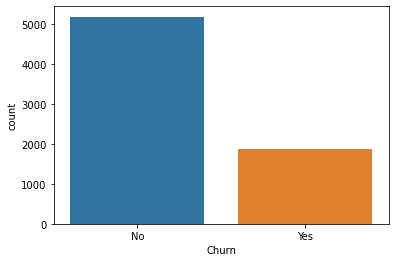

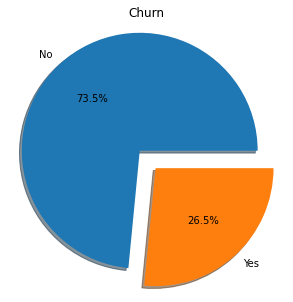

In [40]:
#Checking of value counts in target variable
sns.countplot(df['Churn'])
plt.show()

var = 'Churn'
plt.figure(figsize=(5,5))
data = list(df[var].value_counts())
plt.pie(data, labels= ['No','Yes'], autopct='%1.1f%%', explode=[0.1,0.1], shadow=True)
plt.axis('equal')
plt.title(var)
plt.show()

Loan status is in ratio Y:N as 1:3
        
This can be balanced using oversampling technique for better prediction model performance

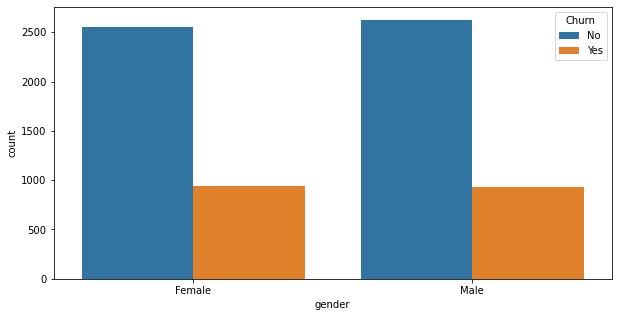

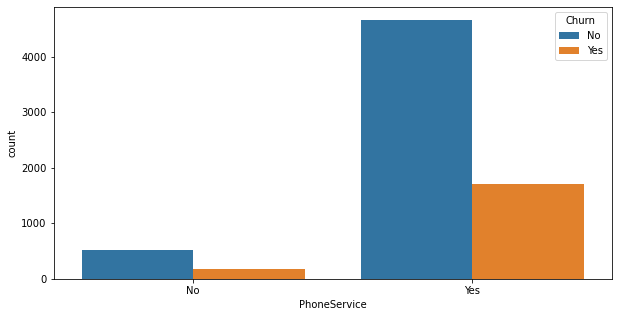

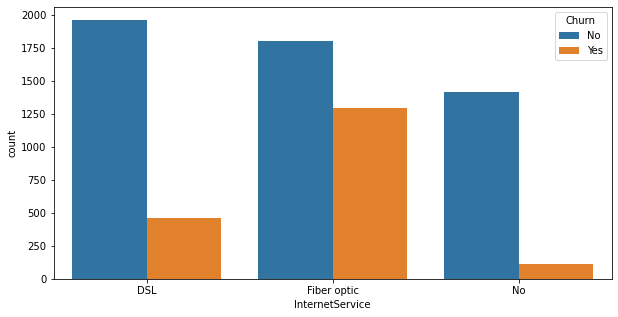

In [43]:
#Customer churn status among different genders
plt.figure(figsize=(10, 5))
sns.countplot(df['gender'], hue=df['Churn'])
plt.show()

#Customer churn status among phone service users
plt.figure(figsize=(10, 5))
sns.countplot(df['PhoneService'], hue=df['Churn'])
plt.show()

#Customer churn status among internet service users
plt.figure(figsize=(10, 5))
sns.countplot(df['InternetService'], hue=df['Churn'])
plt.show()

Among the number of customers who have churned (stopped using the phone service):
    
Majority were using phone service

Among internet serice users, majority of them were using fiber optic service

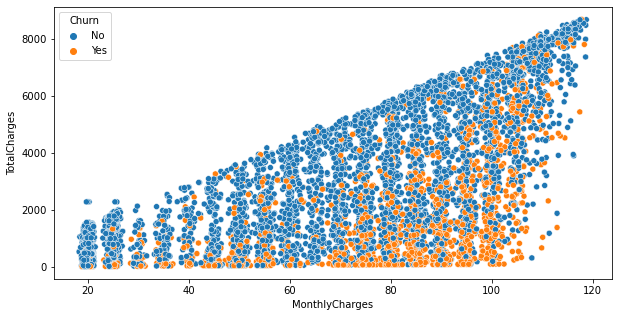

In [45]:
#Scatter plot vizualization of Monthly v/s total charges
plt.figure(figsize=(10,5))
sns.scatterplot(y = df['TotalCharges'], x = df['MonthlyCharges'], hue = df['Churn'])
plt.show()

Total charges vary positively with monthly charges

We can observe that the concentration of churned customer numbers are lying in lower region of the graph, this suggests that reason for leaving the service is majorly costly monthly charges

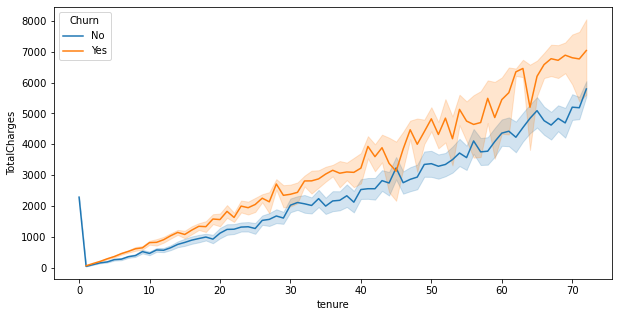

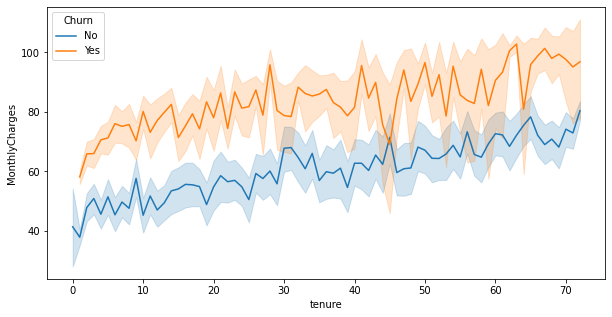

In [46]:
#Line plot vizualization of Monthly , total charges vs tenure
plt.figure(figsize=(10,5))
sns.lineplot(y = df['TotalCharges'], x = df['tenure'], hue = df['Churn'])
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(y = df['MonthlyCharges'], x = df['tenure'], hue = df['Churn'])
plt.show()

In both of the above graphs "the customers who left using the service" their line is lying above the non-churned ones

This suggests that more the cost of a service, generally tendency of losing the customers is more

In [47]:
#Encoding the target data
df['Churn'] = df['Churn'].replace({"Yes":1, "No":0 })

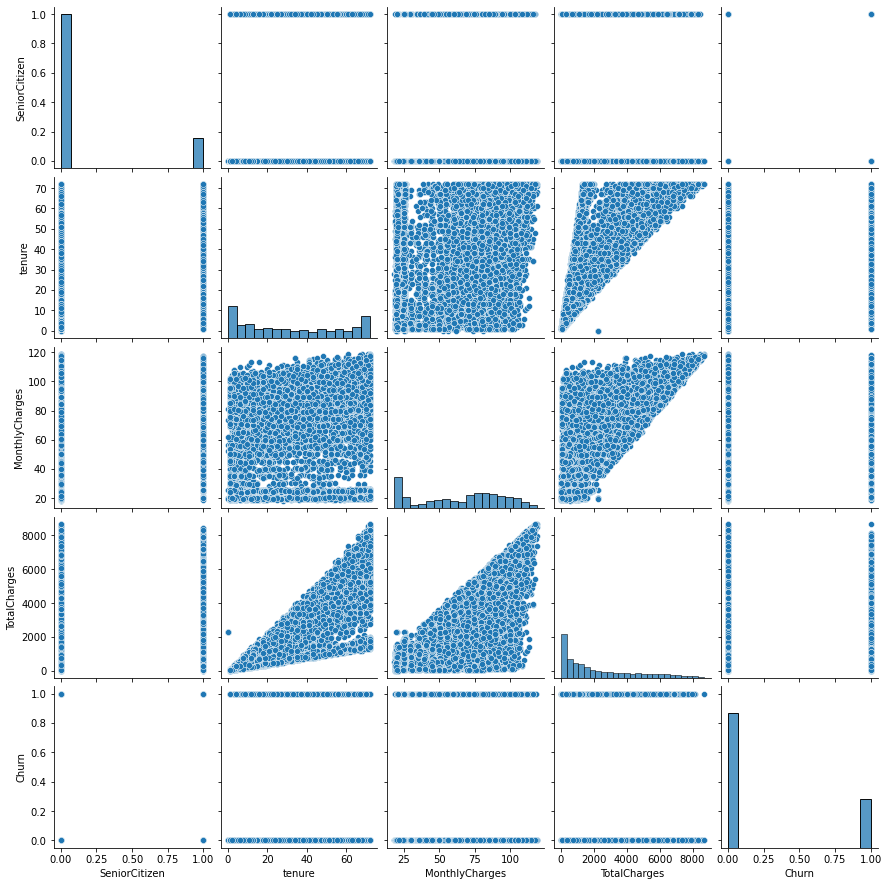

In [48]:
#Plotting all possible bivariate plots together
sns.pairplot(df)
plt.show()

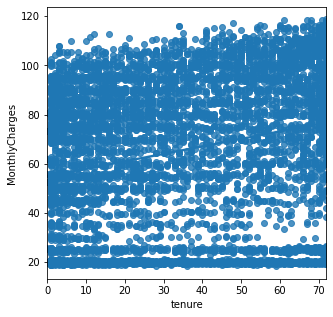

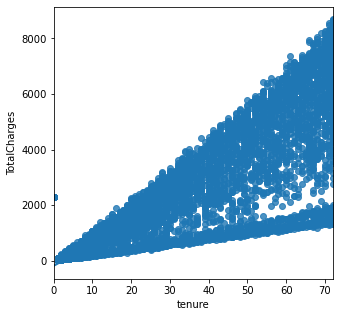

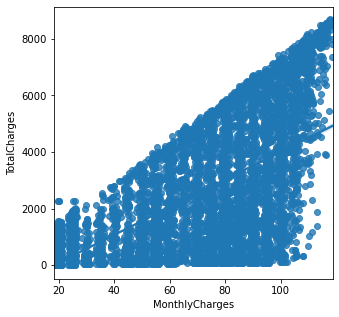

In [54]:
#Let us regplot monthly, total charges and tenure wit respect to each other
plt.figure(figsize=(5,5))
sns.regplot(y = df['MonthlyCharges'], x = df['tenure'])
plt.show()
plt.figure(figsize=(5,5))
sns.regplot(y = df['TotalCharges'], x = df['tenure'])
plt.show()
plt.figure(figsize=(5,5))
sns.regplot(y = df['TotalCharges'], x = df['MonthlyCharges'])
plt.show()

Total charges and tenure showing strong positive correlation

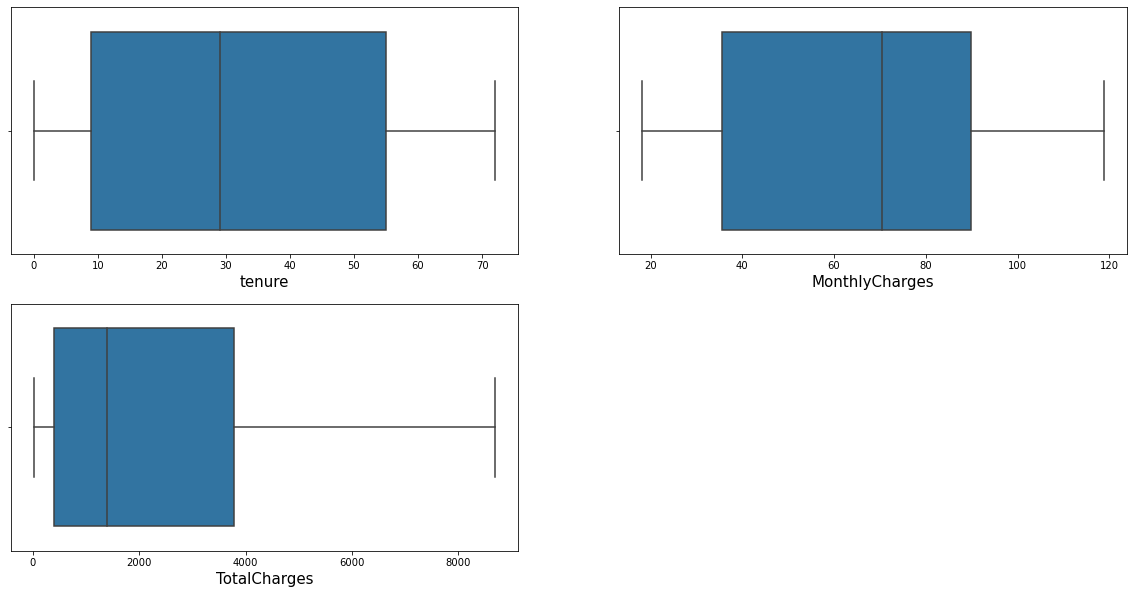

In [55]:
#Outliers/noise checking for input numerical feature columns
plt.figure(figsize=(20,10))
pltno = 1
for columns in numerical:
    if pltno <=3:
        ax = plt.subplot(2,2,pltno)
        sns.boxplot(x = df[columns])
        plt.xlabel(columns, fontsize=15)       
    pltno += 1
plt.show()

No outliers are present in input numerical feature columns

In [56]:
#Statistical summary of the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2265.000258,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [57]:
#Coefficient of correlation matrix
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102395,0.150889
tenure,0.016567,1.000000,0.247900,0.824757,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.650468,0.193356
TotalCharges,0.102395,0.824757,0.650468,1.000000,-0.199428
Churn,0.150889,-0.352229,0.193356,-0.199428,1.000000


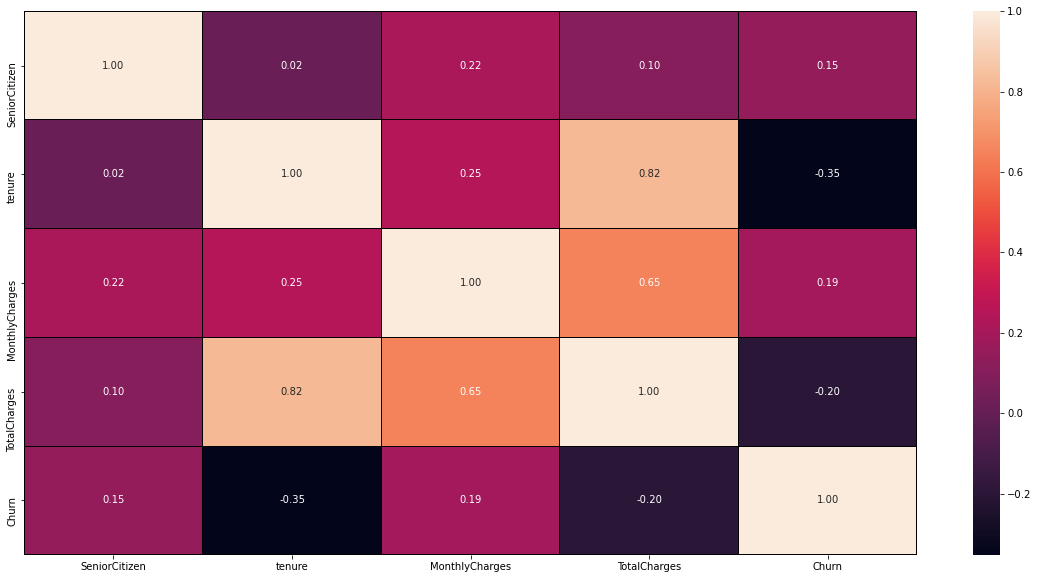

In [58]:
#Heatmap to vizualize correlation between different features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')
plt.show()

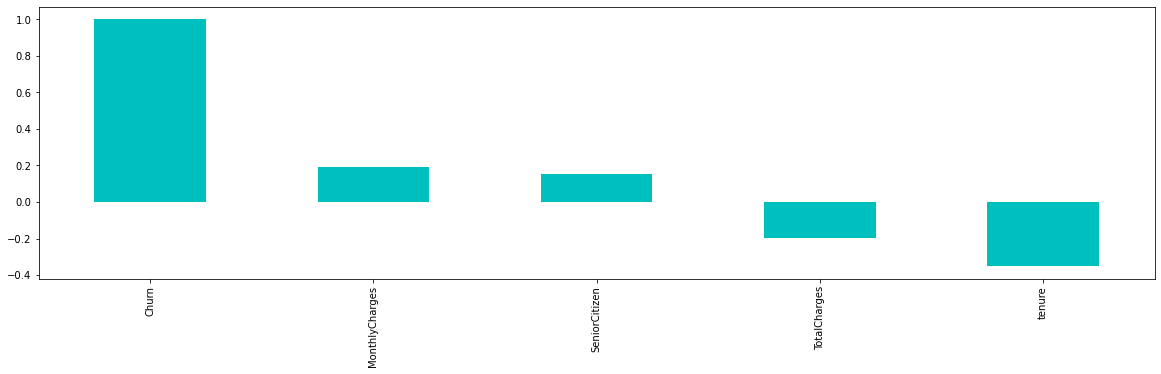

Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199428
tenure           -0.352229
Name: Churn, dtype: float64

In [59]:
#Sorting descending values of correlation data of target variable
#Plotting the same for vizualization
plt.figure(figsize=(20,5))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', color='c')
plt.show()
df.corr()['Churn'].sort_values(ascending=False)

In [75]:
#Encoding the categorical/text type data into numerical form
df['gender'] = df['gender'].replace({"Male":1, "Female":0 })
df['Partner'] = df['Partner'].replace({"Yes":1, "No":0 })
df['Dependents'] = df['Dependents'].replace({"Yes":1, "No":0 })
df['PhoneService'] = df['PhoneService'].replace({"Yes":1, "No":0 })
df['MultipleLines'] = df['MultipleLines'].replace({"Yes":2, "No":1 , "No phone service":0 })
df['InternetService'] = df['InternetService'].replace({"Fiber optic":2,'DSL':1, "No":0 })
df['OnlineSecurity'] = df['OnlineSecurity'].replace({"Yes":2, "No":1 ,'No internet service':0})
df['OnlineBackup'] = df['OnlineBackup'].replace({"Yes":2, "No":1 ,'No internet service':0})
df['DeviceProtection'] = df['DeviceProtection'].replace({"Yes":2, "No":1 ,'No internet service':0})
df['TechSupport'] = df['TechSupport'].replace({"Yes":2, "No":1 ,'No internet service':0})
df['StreamingTV'] = df['StreamingTV'].replace({"Yes":2, "No":1 ,'No internet service':0})
df['StreamingMovies'] = df['StreamingMovies'].replace({"Yes":2, "No":1 ,'No internet service':0})
df['Contract'] = df['Contract'].replace({"Month-to-month":2, "Two year":1 ,'One year':0})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({"Yes":1, "No":0 })
df['PaymentMethod'] = df['PaymentMethod'].replace({"Electronic check":3, "Mailed check":2 ,'Bank transfer (automatic)':1, 'Credit card (automatic)':0})

In [78]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,1,1,2,1,3,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,1,0,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,1,1,2,2,1,1,1,1,2,1,2,53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,1,0,0,1,42.30,1840.75,0
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,2,1,3,70.70,151.65,1


In [79]:
#Removing of outliers by zscore method
print('Shape before',df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df[['TotalCharges', 'MonthlyCharges', 'tenure']]))
df_new = df[(z<3).all(axis=1)]
print('Shape after',df_new.shape)

#Percentage loss of data
loss = (df.shape[0]-df_new.shape[0])*100/(df.shape[0])
print(loss,'% loss of data')

Shape before (7043, 20)
Shape after (7043, 20)
0.0 % loss of data


No outliers present as previously observed from boxplots also

In [80]:
#Seperate feature and target columns
x = df_new.drop('Churn', axis=1)
y = df_new['Churn']
print('x shape',x.shape)
print('y shape',y.shape)

x shape (7043, 19)
y shape (7043,)


Feature selection method:

Since most of input data is discrete type and categorical type in nature, VIF method cannot be applied for checking multicollinearity

And we cannot handle multicollinearity by PCA technique

In order to handle feature selection (reduce curse of dimensionality / handling multicollinearity) let us use ExtraTreesClassifier method

In [81]:
#Feature selection
from sklearn.ensemble import ExtraTreesClassifier
fs = ExtraTreesClassifier()
fs.fit(x, y)

ExtraTreesClassifier()

In [82]:
imp = fs.feature_importances_
for index, val in enumerate(imp):
    print(index, round((val * 100), 2))

0 3.79
1 2.63
2 3.06
3 2.4
4 15.63
5 0.58
6 2.91
7 4.81
8 3.74
9 3.5
10 3.1
11 3.48
12 2.8
13 2.83
14 6.28
15 2.93
16 6.72
17 13.12
18 15.68


In [83]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [84]:
#Let us select important features and drop rest columns. By considering below 3% as less important.
#Dropping off less important columns
x =  x.drop(['SeniorCitizen', 'Dependents','StreamingTV','PaperlessBilling', 'PhoneService','MultipleLines','StreamingMovies'], axis=1)

In [88]:
lis = ['TotalCharges','MonthlyCharges','tenure']
x[lis].skew()

TotalCharges      0.962394
MonthlyCharges   -0.220524
tenure            0.239540
dtype: float64

Skewness is not within limit of <0.55

In [89]:
#Apply power transform to reduce skewness
from sklearn.preprocessing import PowerTransformer
po = PowerTransformer()
for col in lis:
    if x.skew().loc[col]>0.55:
        x[col] = po.fit_transform(x[col].values.reshape(-1,1))
        
#Again checking skewnessof continuous feature variables
x[lis].skew()

TotalCharges     -0.144899
MonthlyCharges   -0.220524
tenure            0.239540
dtype: float64

Skewness is within allowable limit

In [90]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smt = SMOTE(1.0) #Up sampling to 1:1 ratio of target variable
x1, y1 = smt.fit_resample(x, y)

print('Before', Counter(y))
print('After', Counter(y1))

Before Counter({0: 5174, 1: 1869})
After Counter({0: 5174, 1: 5174})


In [91]:
x = x1
y = y1

#scaling of input feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [92]:
#Logistic regression
#Best randm state selection
max_acc = 0
max_RS = 0
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
lr = LogisticRegression()
for i in range(0,200):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.2)
    lr.fit(xtr, ytr)
    predyt = lr.predict(xt)
    accuracy = accuracy_score(yt,predyt)  
    if accuracy > max_acc:
        max_acc = accuracy
        max_RS = i
        print('At Max RS',i,'Max Accuracy =',accuracy)

At Max RS 0 Max Accuracy = 0.77487922705314
At Max RS 1 Max Accuracy = 0.7777777777777778
At Max RS 2 Max Accuracy = 0.7797101449275362
At Max RS 8 Max Accuracy = 0.7893719806763285
At Max RS 10 Max Accuracy = 0.797584541062802


In [93]:
def metric_score(model, xtr, xt, ytr, yt, train=True):
    if train:
        ypr = model.predict(xtr)
        print(f"Accuracy score of train is : {(accuracy_score(ytr, ypr))*100:.2f}%")
        
    elif train==False:
        ypr = model.predict(xt)
        print(f"Accuracy score of test is : {(accuracy_score(yt, ypr))*100:.2f}%",'\n\nClassification report:')
        print(classification_report(yt, ypr))

In [94]:
#Using best random state for train test split
xtr, xt, ytr, yt = train_test_split(x,y, random_state=10,test_size=0.2)
#Training the model
model = LogisticRegression()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 77.40%
Accuracy score of test is : 79.76% 

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1057
           1       0.78      0.82      0.80      1013

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



In [95]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.797584541062802
CV score at 2 = 0.7626594511016622
CV score at 3 = 0.7664319980726754
CV score at 4 = 0.7705836876691148
CV score at 5 = 0.7713599185585233
CV score at 6 = 0.7722303484761873
CV score at 7 = 0.7727143211351081
CV score at 8 = 0.7715557764971532
CV score at 9 = 0.771747581387722
CV score at 10 = 0.7731971892841458

Least difference of CV score and F1 score of testing is : 0.02438735177865614


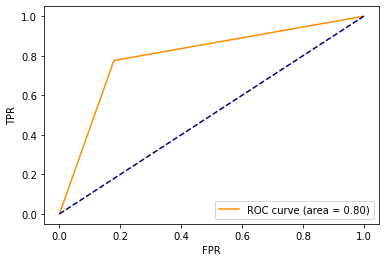

Confusion matrix:
 [[510 484]
 [489 587]] 

Area under curve = 0.7984739290763166


In [96]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(ypr,predyt),'\n')
print('Area under curve =',roc_auc)

In [97]:
#Saving the results of model
model_result = pd.DataFrame(columns=['Algorithm name','Accuracy f1 score test' ,'CV score','F1-CV score diff',"Area under curve"])
model_result.loc[len(model_result.index)] = ['Logistic regression', acc, cvs, least_diff,roc_auc] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.797585,0.773197,0.024387,0.798474


In [104]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 99.77%
Accuracy score of test is : 78.45% 

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1057
           1       0.77      0.80      0.78      1013

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070



In [105]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.7845410628019324
CV score at 2 = 0.7590838809431775
CV score at 3 = 0.7702029993991116
CV score at 4 = 0.7773482798608427
CV score at 5 = 0.7745528073726952
CV score at 6 = 0.7787066366275486
CV score at 7 = 0.785090630904968
CV score at 8 = 0.7823873436922868
CV score at 9 = 0.7761988370479687
CV score at 10 = 0.7806420355264019

Least difference of CV score and F1 score of testing is : -0.0005495681030356359


In [107]:
# Hyper parameter tuning for decision tree model
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':["gini", "entropy"],
              'splitter':["best", "random"],
              'max_depth':[8,12,16],
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features='sqrt')


In [122]:
#Training model as per best parameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features='sqrt')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 87.57%
Accuracy score of test is : 78.94% 

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1057
           1       0.76      0.84      0.80      1013

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



In [123]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.7893719806763285
CV score at 2 = 0.760436799381523
CV score at 3 = 0.7714586178448419
CV score at 4 = 0.7782180131426363
CV score at 5 = 0.782476493346689
CV score at 6 = 0.7835381709763833
CV score at 7 = 0.7803553505766079
CV score at 8 = 0.7909851644391211
CV score at 9 = 0.7906907497803173
CV score at 10 = 0.7909808538670703

Least difference of CV score and F1 score of testing is : -0.0016131837627926249


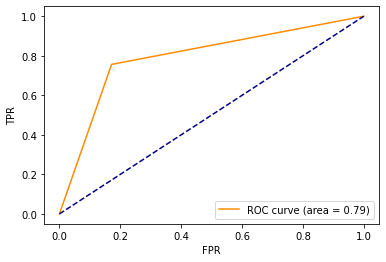

Confusion matrix:
 [[783 274]
 [162 851]] 

Area under curve = 0.7925079365079365


In [124]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

In [125]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Decision tree classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.797585,0.773197,0.024387,0.798474
1,Decision tree classifier,0.789372,0.790985,0.001613,0.792508


In [126]:
#Support vector machine classifier
from sklearn.svm import SVC
model = SVC()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 80.77%
Accuracy score of test is : 81.55% 

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1057
           1       0.80      0.83      0.82      1013

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



In [127]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8154589371980676
CV score at 2 = 0.7766718206416698
CV score at 3 = 0.7816065708326855
CV score at 4 = 0.7863355237727097
CV score at 5 = 0.7899174144199046
CV score at 6 = 0.7905933846688411
CV score at 7 = 0.7922403434800265
CV score at 8 = 0.7933046776663307
CV score at 9 = 0.7946526069718259
CV score at 10 = 0.7942656911389567

Least difference of CV score and F1 score of testing is : 0.020806330226241676


In [ ]:
# Hyper parameter tuning for svc model
from sklearn.model_selection import GridSearchCV
parameters = {'gamma':['scale', 'auto'],
              'max_iter':range(50,500,50),
              'kernel':["linear", "poly", "rbf"],
              'tol':[0.0001,0.001,0.01]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

In [146]:
#Training model as per best parameters
model = SVC()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 80.77%
Accuracy score of test is : 81.55% 

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1057
           1       0.80      0.83      0.82      1013

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



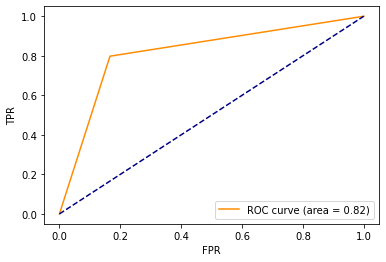

Confusion matrix:
 [[843 214]
 [168 845]] 

Area under curve = 0.8158752308179431


In [147]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

In [148]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Support vector classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.797585,0.773197,0.024387,0.798474
1,Decision tree classifier,0.789372,0.790985,0.001613,0.792508
2,Support vector classifier,0.815459,0.794653,0.020806,0.815875


In [150]:
#K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 84.49%
Accuracy score of test is : 78.84% 

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1057
           1       0.77      0.81      0.79      1013

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



In [151]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.7884057971014493
CV score at 2 = 0.7687475840742173
CV score at 3 = 0.7733917693709441
CV score at 4 = 0.781310398144569
CV score at 5 = 0.7807359152709774
CV score at 6 = 0.7817989284553392
CV score at 7 = 0.7846065027662877
CV score at 8 = 0.7844134717794425
CV score at 9 = 0.7858579819460736
CV score at 10 = 0.7853748399816856

Least difference of CV score and F1 score of testing is : 0.002547815155375721


In [171]:
# Hyper parameter tuning for KNN model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_neighbors':range(4,10), 
              'weights':['uniform','distance'], 
              'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'leaf_size':[5,8,10,12]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

KNeighborsClassifier(leaf_size=5, n_neighbors=19, weights='distance')


In [172]:
#Training model as per best parameters
model = KNeighborsClassifier(leaf_size=5, n_neighbors=19, weights='distance')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 99.77%
Accuracy score of test is : 82.03% 

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1057
           1       0.79      0.86      0.82      1013

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



In [173]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8202898550724638
CV score at 2 = 0.7891379976807112
CV score at 3 = 0.7972614620494913
CV score at 4 = 0.8066293003478933
CV score at 5 = 0.8062491857019773
CV score at 6 = 0.8067322931728258
CV score at 7 = 0.8084781110428398
CV score at 8 = 0.8101208684020842
CV score at 9 = 0.8103091535172361
CV score at 10 = 0.8101155869518497

Least difference of CV score and F1 score of testing is : 0.009980701555227678


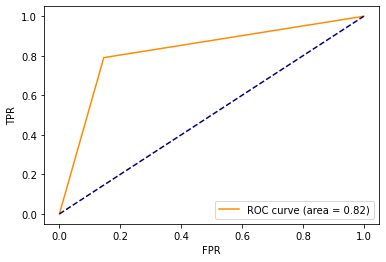

Confusion matrix:
 [[826 231]
 [141 872]] 

Area under curve = 0.822379690249681


,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.797585,0.773197,0.024387,0.798474
1,Decision tree classifier,0.789372,0.790985,0.001613,0.792508
2,Support vector classifier,0.815459,0.794653,0.020806,0.815875
3,KNN classifier,0.820290,0.810309,0.009981,0.822380


In [174]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['KNN classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

In [176]:
#Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 79.43%
Accuracy score of test is : 81.55% 

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1057
           1       0.78      0.86      0.82      1013

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



In [177]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8154589371980676
CV score at 2 = 0.7704870506378044
CV score at 3 = 0.7761946822085237
CV score at 4 = 0.7855624275222265
CV score at 5 = 0.7865332969088197
CV score at 6 = 0.7882739836578231
CV score at 7 = 0.7876978517598071
CV score at 8 = 0.7889541055092754
CV score at 9 = 0.7930097585381953
CV score at 10 = 0.7896280099795364

Least difference of CV score and F1 score of testing is : 0.022449178659872282


In [193]:
# Hyper parameter tuning for adaboost model
from sklearn.model_selection import GridSearchCV
parameters = { 'algorithm':['SAMME', 'SAMME.R'], 
              'n_estimators':[80,90,110,150], 
              'learning_rate' :[0.01, 0.1,1], 
              'random_state':[10,25,50,75]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

AdaBoostClassifier(learning_rate=1, n_estimators=80, random_state=10)


In [194]:
#Training model as per best parameters
model = AdaBoostClassifier(learning_rate=1, n_estimators=80, random_state=10)
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 79.80%
Accuracy score of test is : 82.03% 

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1057
           1       0.79      0.87      0.83      1013

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



In [195]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8202898550724638
CV score at 2 = 0.7729029764205644
CV score at 3 = 0.7777413603046742
CV score at 4 = 0.7897178198685736
CV score at 5 = 0.7903028604917777
CV score at 6 = 0.7908826793099969
CV score at 7 = 0.7919495921181221
CV score at 8 = 0.790597196771105
CV score at 9 = 0.7935901413957948
CV score at 10 = 0.7923337911959558

Least difference of CV score and F1 score of testing is : 0.026699713676669012


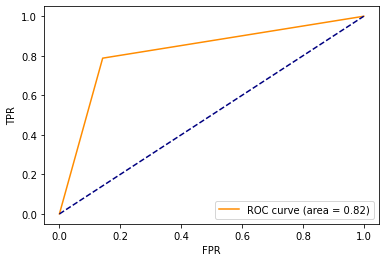

Confusion matrix:
 [[821 236]
 [136 877]] 

Area under curve = 0.822924852202666


,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.797585,0.773197,0.024387,0.798474
1,Decision tree classifier,0.789372,0.790985,0.001613,0.792508
2,Support vector classifier,0.815459,0.794653,0.020806,0.815875
3,KNN classifier,0.820290,0.810309,0.009981,0.822380
4,Adaboost classifier,0.820290,0.793590,0.026700,0.822925


In [196]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['Adaboost classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

In [203]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 99.77%
Accuracy score of test is : 83.62% 

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1057
           1       0.82      0.85      0.84      1013

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



In [204]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.836231884057971
CV score at 2 = 0.8054696559721686
CV score at 3 = 0.8210353207468944
CV score at 4 = 0.8281793583301121
CV score at 5 = 0.8286702484105136
CV score at 6 = 0.8331148211663696
CV score at 7 = 0.8343770059001157
CV score at 8 = 0.834476467030294
CV score at 9 = 0.8338894985347477
CV score at 10 = 0.8358217699660807

Least difference of CV score and F1 score of testing is : 0.00041011409189029013


In [222]:
# Hyper parameter tuning for random forest model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators':[80,90,100,150], 
              'criterion':["entropy",'gini'], 
              'max_depth' :[4, 8, 14, 16, 20], 
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features='log2',
                       n_estimators=90)


In [225]:
#Training model as per best parameters
model = RandomForestClassifier(criterion='entropy', max_depth=14, max_features='log2',n_estimators=90)
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 95.87%
Accuracy score of test is : 84.69% 

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1057
           1       0.82      0.88      0.85      1013

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [226]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8468599033816425
CV score at 2 = 0.8046965597216853
CV score at 3 = 0.8193923884679869
CV score at 4 = 0.8311751063007344
CV score at 5 = 0.8283801598475774
CV score at 6 = 0.8307958124572671
CV score at 7 = 0.8356328112879234
CV score at 8 = 0.8365052099582702
CV score at 9 = 0.8371753635801769
CV score at 10 = 0.8343722142797073

Least difference of CV score and F1 score of testing is : 0.009684539801465664


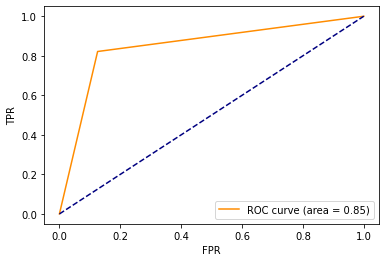

Confusion matrix:
 [[864 193]
 [124 889]] 

Area under curve = 0.8480602722503687


,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.797585,0.773197,0.024387,0.798474
1,Decision tree classifier,0.789372,0.790985,0.001613,0.792508
2,Support vector classifier,0.815459,0.794653,0.020806,0.815875
3,KNN classifier,0.820290,0.810309,0.009981,0.822380
4,Adaboost classifier,0.820290,0.793590,0.026700,0.822925
5,Random forest classifier,0.846860,0.837175,0.009685,0.848060


In [227]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

#Saving the results of model
model_result.loc[len(model_result.index)] = ['Random forest classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

By considering F1-Cv score diff, max F1 test score and max AUC all these deciding factors suggests Random forest classifier as best algorithm

In [228]:
#Prediction using selected best model
model = RandomForestClassifier(criterion='entropy', max_depth=14, max_features='log2',n_estimators=90)
model.fit(xtr,ytr)
predyt = model.predict(xt)

In [232]:
table = pd.DataFrame()
table['Actual churn'] = ['No' if i==0 else 'Yes' for i in yt]
table['Predicted churn'] = ['No' if i==0 else 'Yes' for i in predyt]
table.sample(10)

,Actual churn,Predicted churn
2050,No,No
559,Yes,Yes
1892,No,No
889,Yes,Yes
1874,No,No
1887,Yes,No
1678,No,No
1796,Yes,Yes
623,No,No
833,No,No


In [233]:
#Saving the model
import pickle
filename='churn.pkl'
pickle.dump(model,open(filename,'wb'))